<center>
    <h1>
    CS 3891-06 HW2
        
        Eddie Shangguan

In [1]:
%pip install strym

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install strym matplotlib

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install gmaps

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import os
import cantools
import warnings
warnings.filterwarnings("ignore")
import datetime
import strym
import strym as s
from strym import strymread
from strym import strymmap
from strym import meta



In [5]:
toyota_can = pd.read_csv('2020-07-08-20-22-14_Toyota_CAN_Messages.csv')

In [6]:
toyota_can.head(1)
toyota_can.tail(1)

,Time,Bus,MessageID,Message,MessageLength
2398528,1.594266e+09,0,608,00002affe80060db,8


In [7]:
toyota_can

,Time,Bus,MessageID,Message,MessageLength
0,1.594265e+09,0,295,0010000806303cba,8
1,1.594265e+09,0,37,00000000f000001d,8
2,1.594265e+09,0,36,020201fa421180fe,8
3,1.594265e+09,0,180,00000000e111a452,8
4,1.594265e+09,0,170,2c002c1b2c6d2beb,8
...,...,...,...,...,...
2398524,1.594266e+09,1,443,497ffc00000ffc93,8
2398525,1.594266e+09,0,560,0000000400003d,7
2398526,1.594266e+09,0,1114,6c02000000000000,8
2398527,1.594266e+09,0,740,fc000000e7,5


### Minitest 1: Toyota CAN and GPS data

**Load the Toyota CAN data from file 2020-07-08-20-22-14_Toyota_CAN_Messages.csv. Describe the file as follows:**

**Question 3.1 What are the start and end datetimes of this file?**

The start datetime is Thu Jul 09 2020 03:22:14 GMT+0000

The end datetime is Thu Jul 09 2020 03:37:53 GMT+0000

In [8]:
start_time = toyota_can.Time.min()
end_time = toyota_can.Time.max()
print(start_time)
print(end_time)

1594264934.400283
1594265873.298786


**Question 3.2 What is the duration of the file (in seconds)?**

The duration of the file is 939 seconds.

In [9]:
print(round(end_time - start_time))

939


**Question 3.3 What are the unique messages of this file?**

There are 180 unique Message IDs in this file, which are printed in sorted order below. There are 961006 unique messages in this file. 


In [10]:
print(toyota_can.Message.nunique())
print(toyota_can.MessageID.nunique())
print(np.array(sorted(toyota_can.MessageID.unique())))

# unique_messages = df.drop_duplicates(subset=['MessageID', 'Message'])[['MessageID', 'Message']]

# output = unique_messages.apply(lambda x: f"Message ID: {x['MessageID']}, Message: {x['Message']}", axis=1).tolist()
# print(output)

961006
180
[  36   37  166  170  180  291  295  296  304  352  353  384  385  386
  387  388  389  390  391  392  393  394  395  396  397  398  399  400
  401  402  403  404  405  406  407  408  409  410  411  412  413  414
  415  416  417  418  419  426  436  437  438  439  440  441  442  443
  452  466  467  550  552  560  562  576  577  578  579  580  581  582
  583  584  608  610  643  713  728  740  742  743  761  764  765  800
  810  812  824  829  830  835  836  863  865  869  870  871  877  881
  882  885  896  898  900  902  905  921  933  934  935  944  945  950
  951  953  955  956  971  975  976  977  978  979  993  998  999 1000
 1001 1002 1014 1017 1020 1041 1042 1044 1056 1057 1059 1063 1071 1076
 1077 1084 1085 1086 1088 1089 1104 1114 1132 1161 1162 1163 1164 1165
 1166 1167 1172 1235 1237 1279 1541 1552 1553 1556 1557 1568 1570 1571
 1572 1592 1594 1595 1649 1745 1775 1779 1786 1787 1788 1789]


**Question 3.4 How many lines are in the file?**

There are 2398529 lines.

In [11]:
print(toyota_can.shape[0])

2398529


**Do a similar exercise for the GPS file for the Toyota vehicle: 2020-07-08-20-22-14_Toyota_GPS_Messages.csv**

In [12]:
toyota_gps = pd.read_csv('2020-07-08-20-22-14_Toyota_GPS_Messages.csv')

In [13]:
toyota_gps.head(1)

,Gpstime,Status,Long,Lat,Alt,HDOP,PDOP,VDOP
0,1.594265e+09,A,-86.777745,36.13422,158.8,0.88,1.58,1.32


In [14]:
toyota_gps

,Gpstime,Status,Long,Lat,Alt,HDOP,PDOP,VDOP
0,1.594265e+09,A,-86.777745,36.134220,158.8,0.88,1.58,1.32
1,1.594265e+09,A,-86.777731,36.134220,158.8,0.88,1.58,1.32
2,1.594265e+09,A,-86.777716,36.134221,158.7,0.88,1.58,1.32
3,1.594265e+09,A,-86.777702,36.134221,158.7,0.88,1.58,1.32
4,1.594265e+09,A,-86.777688,36.134221,158.6,0.88,1.58,1.32
...,...,...,...,...,...,...,...,...
9383,1.594266e+09,A,-86.777733,36.134248,160.1,0.93,1.83,1.58
9384,1.594266e+09,A,-86.777739,36.134248,160.1,0.93,1.83,1.58
9385,1.594266e+09,A,-86.777746,36.134248,160.1,0.93,1.83,1.58
9386,1.594266e+09,A,-86.777753,36.134248,160.1,0.93,1.83,1.58


**Question 3.5 What are the start and end datetimes of this file?**

The start datetime is Thu Jul 09 2020 03:22:14 GMT+0000.

The end datetime is Thu Jul 09 2020 03:37:53 GMT+0000.

In [15]:
start_time_gps = toyota_gps.Gpstime.min()
end_time_gps = toyota_gps.Gpstime.max()
print(start_time_gps)
print(end_time_gps)

1594264934.5
1594265873.2


**Question 3.6 What is the duration of the file (in seconds)?**

The duration of the file is 939 seconds.

In [16]:
print(round(end_time_gps - start_time_gps))

939


**Question 3.7 How many lines are in the file?**

There are 9388 lines in the file.

In [17]:
print(toyota_gps.shape[0])

9388


### Minitest 1: Honda CAN and GPS data

**Answer the same questions using CAN data from the Honda vehicle in file 2020-07-08-20-22-16_Honda_CAN_Messages.csv. Describe the file as follows:**

In [18]:
honda_can = pd.read_csv('2020-07-08-20-22-16_Honda_CAN_Messages.csv')

In [19]:
honda_can.head(1)

,Time,Bus,MessageID,Message,MessageLength
0,1.594265e+09,2,379,0000000000000023,8


In [20]:
honda_can

,Time,Bus,MessageID,Message,MessageLength
0,1.594265e+09,2,379,0000000000000023,8
1,1.594265e+09,0,379,0000000000000023,8
2,1.594265e+09,2,419,5505102014100002,8
3,1.594265e+09,0,419,5505102014100002,8
4,1.594265e+09,2,229,001b0a4b,4
...,...,...,...,...,...
4735205,1.594266e+09,0,422,00104022a080000c,8
4735206,1.594266e+09,2,542,00000000020005,7
4735207,1.594266e+09,0,542,00000000020005,7
4735208,1.594266e+09,2,837,4000400004,5


**Question 3.8 What are the start and end datetimes of this file?**

The start datetime is Thu Jul 09 2020 03:22:16 GMT+0000

The end datetime is Thu Jul 09 2020 03:37:49 GMT+0000

In [21]:
start_time_honda_can = honda_can.Time.min()
end_time_honda_can = honda_can.Time.max()
print(start_time_honda_can)
print(end_time_honda_can)

1594264936.000816
1594265869.299626


**Question 3.9 What is the duration of the file (in seconds)?**

The duration is 933 seconds.

In [22]:
print(round(end_time_honda_can - start_time_honda_can))

933


**Question 3.10 What are the unique messages of this file?**

There are 106 unique Message IDs in this file, which are printed in sorted order below. There are 872841 unique messages in this file. 

In [23]:
print(honda_can.Message.nunique())
print(honda_can.MessageID.nunique())
print(np.array(sorted(honda_can.MessageID.unique())))

872841
106
[  57  145  228  229  308  316  334  342  344  379  380  399  419  420
  422  425  426  427  432  463  464  476  490  506  507  538  542  545
  546  597  660  768  769  773  777  780  795  800  804  808  819  821
  829  837  856  871  882  884  891  892  923  929  963  965  966  967
  983  985 1024 1027 1029 1036 1040 1041 1042 1043 1044 1045 1046 1047
 1056 1057 1058 1059 1060 1064 1072 1073 1074 1075 1076 1077 1078 1079
 1080 1081 1088 1089 1090 1091 1092 1093 1108 1125 1279 1280 1296 1297
 1424 1600 1601 1612 1613 1616 1618 1668]


**Question 3.11 How many lines are in the file?**

There are 4735210 lines in the file.

In [24]:
print(honda_can.shape[0])

4735210


**Do a similar exercise for the GPS file for the Honda vehicle: 2020-07-08-20-22-16_Honda_GPS_Messages.csv.**

In [25]:
honda_gps = pd.read_csv('2020-07-08-20-22-16_Honda_GPS_Messages.csv')

In [26]:
honda_gps.head(1)

,Gpstime,Status,Long,Lat,Alt,HDOP,PDOP,VDOP
0,1.594265e+09,A,-86.777749,36.134222,159.1,0.83,1.56,1.31


In [27]:
honda_gps

,Gpstime,Status,Long,Lat,Alt,HDOP,PDOP,VDOP
0,1.594265e+09,A,-86.777749,36.134222,159.1,0.83,1.56,1.31
1,1.594265e+09,A,-86.777735,36.134222,159.1,0.83,1.56,1.31
2,1.594265e+09,A,-86.777721,36.134222,159.1,0.83,1.56,1.31
3,1.594265e+09,A,-86.777706,36.134222,159.0,0.83,1.56,1.31
4,1.594265e+09,A,-86.777692,36.134223,159.0,0.83,1.56,1.31
...,...,...,...,...,...,...,...,...
9327,1.594266e+09,A,-86.777725,36.134241,157.1,0.93,1.83,1.58
9328,1.594266e+09,A,-86.777733,36.134241,157.0,0.93,1.83,1.58
9329,1.594266e+09,A,-86.777741,36.134241,157.1,0.93,1.83,1.58
9330,1.594266e+09,A,-86.777749,36.134241,157.0,0.93,1.83,1.58


**Question 3.12 What are the start and end datetimes of this file?**

The start datetime is Thu Jul 09 2020 03:22:16 GMT+0000

The end datetime is Thu Jul 09 2020 03:37:49 GMT+0000

In [28]:
start_time_honda_gps = honda_gps.Gpstime.min()
end_time_honda_gps = honda_gps.Gpstime.max()
print(start_time_honda_gps)
print(end_time_honda_gps)

1594264936.1
1594265869.2


**Question 3.13 What is the duration of the file (in seconds)?**

The duration is 933 seconds.

In [29]:
print(round(end_time_honda_gps - start_time_honda_gps))

933


**Question 3.14 How many lines are in the file?**

There are 9332 lines.

In [30]:
print(honda_gps.shape[0])

9332


### Comparison on CAN and GPS data across vehicle types

**Question 3.15 Do you see common message types for each of the cars, based on MessageID?**

Yes, there are 18 common message types for Toyota and Honda. Results are printed.

In [31]:
MessageID_toyota = sorted(toyota_can.MessageID.unique())
MessageID_honda = sorted(honda_can.MessageID.unique())
common_message = set(MessageID_toyota).intersection(MessageID_honda)
print(common_message)
print(len(common_message))

{800, 1056, 1057, 419, 1059, 1088, 1089, 871, 426, 399, 1041, 882, 1042, 1044, 1076, 1077, 829, 1279}
18


**Question 3.16 What reflections do you have, after looking at these metadata? Do you think the cars
drove at the same time, based on what you see?**

The cars are driving at the same time since the timestamps overlap, and there's a wide range of unique message IDs. The driving durations are highly similar, but the Toyoto started a bit earlier and ended a bit later.

### 3.2 Single car analysis: Minitest 1, Toyota CAN Data only

**Let’s look at a single vehicle trajectory. Load the data for the Toyota vehicle, and use the strym package to help answer the following questions (or use any other package to decode the CAN files that you would like to use).**

In [32]:
toyota_can = pd.read_csv('2020-07-08-20-22-14_Toyota_CAN_Messages.csv')

In [33]:
toyota_can

,Time,Bus,MessageID,Message,MessageLength
0,1.594265e+09,0,295,0010000806303cba,8
1,1.594265e+09,0,37,00000000f000001d,8
2,1.594265e+09,0,36,020201fa421180fe,8
3,1.594265e+09,0,180,00000000e111a452,8
4,1.594265e+09,0,170,2c002c1b2c6d2beb,8
...,...,...,...,...,...
2398524,1.594266e+09,1,443,497ffc00000ffc93,8
2398525,1.594266e+09,0,560,0000000400003d,7
2398526,1.594266e+09,0,1114,6c02000000000000,8
2398527,1.594266e+09,0,740,fc000000e7,5


**Question 3.17 At what time does the vehicle first appear? Please convert your time to something human readable (not UNIX timestamps)**

The vehicle first appears at Thu Jul 09 2020 03:22:14 GMT+0000

In [34]:
start_time_toyota_can = toyota_can.Time.min()
print(start_time_toyota_can)

1594264934.400283


**Question 3.18 At what time does the vehicle exit the roadway?**

The vehicle exits the roadway at Thu Jul 09 2020 03:37:53 GMT+0000

In [35]:
end_time_toyota_can = toyota_can.Time.max()
print(end_time_toyota_can)

1594265873.298786


**Question 3.19 Extract vehicle speed. Is the vehicle reporting speed at regular fixed-time intervals? If so,
what is the interval? If not, describe what is happening?**

The vehicle is not reporting speed at regular intervals. There are fluctuations, and the speed drastically changes from time to time. The vehicle speed reached its maximum around 200s.

**Question 3.20 Extract and plot the speed, using the strym method speed() to return a dataframe.**

See Figure 1 below.

In [36]:
toyota = "2020-07-08-20-22-14_Toyota"
toyota_can_file = toyota + "_CAN_Messages.csv"

dbcfile = 'toyota_rav4_2019.dbc'
csvdata = toyota_can_file
r = strymread(csvfile=csvdata, dbcfile=dbcfile, createdb=True, verbose=False)

UNIQUE constraint failed: RAW_CAN.Clock, RAW_CAN.Bus, RAW_CAN.MessageID, RAW_CAN.Message


In [37]:
r.dataframe

,Time,Bus,MessageID,Message,MessageLength
Clock,,,,,
2020-07-09 03:22:14.400283136,1.594265e+09,0,295,0010000806303cba,8
2020-07-09 03:22:14.400283136,1.594265e+09,0,37,00000000f000001d,8
2020-07-09 03:22:14.400283136,1.594265e+09,0,36,020201fa421180fe,8
2020-07-09 03:22:14.401134848,1.594265e+09,0,180,00000000e111a452,8
2020-07-09 03:22:14.402644992,1.594265e+09,0,170,2c002c1b2c6d2beb,8
...,...,...,...,...,...
2020-07-09 03:37:53.294722048,1.594266e+09,1,442,497ffc00000ffc92,8
2020-07-09 03:37:53.295520000,1.594266e+09,1,443,497ffc00000ffc93,8
2020-07-09 03:37:53.297029888,1.594266e+09,0,560,0000000400003d,7


Text(0.5, 1.0, 'Figure 1: Speed of Toyota Vehicle (km/hr)')

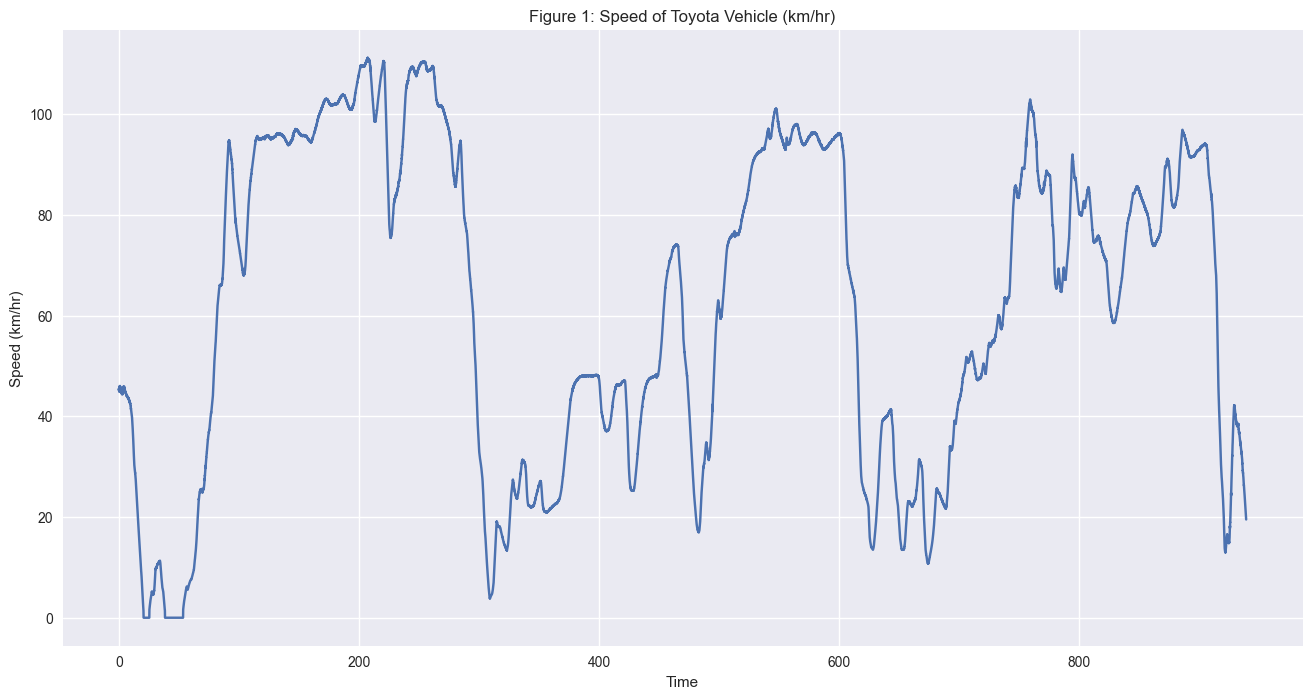

In [38]:
# extract and plot the speed
t_speed = r.speed()
# plot relative timeseries since first data value received.
plt.plot(t_speed.Time-t_speed.iloc[0].Time,t_speed.Message)
plt.xlabel('Time')
plt.ylabel('Speed (km/hr)')
plt.title('Figure 1: Speed of Toyota Vehicle (km/hr)')

**Question 3.21 Calculate the average speed of the vehicle, by adding up speed at each time point and dividing by the number of samples**

The avergae speed is 62.49 km/h.

In [39]:
avg_speed = t_speed.Message.sum()/t_speed.shape[0]
print(avg_speed)

62.49169357514099


**Question 3.22 Using the average speed data and the total time on the road, estimate the total distance the vehicle travels in the direction of travel.**

The total distance is approximiately 16.3 km.

In [40]:
# from 3.2, duration = 939s
total_time = 939 / 3600
total_dist = total_time * avg_speed
print(total_dist)

16.299916740849273


**Question 3.23 What is the maximum speed of this vehicle?**

The maximum speed is 111.21 km/h.

In [41]:
max_speed = t_speed.Message.max()
print(max_speed)

111.21000000000001


**Question 3.24 What is the minimum speed of this vehicle?**

The minimum speed is 0 km/h.

In [42]:
min_speed = t_speed.Message.min()
print(min_speed)

0.0


**Question 3.25 Extract and plot the space gap using the lead_distance method in strym.**

See figure 2 below.

In [43]:
r =strymread(csvfile=csvdata, dbcfile = dbcfile, createdb = True, verbose=False)
lead_distance = r.lead_distance()
lead_distance.reset_index(inplace = True)
lead_distance.head(1)

UNIQUE constraint failed: RAW_CAN.Clock, RAW_CAN.Bus, RAW_CAN.MessageID, RAW_CAN.Message


,Clock,Time,Message,MessageLength
0,2020-07-09 03:22:14.485035776,1.594265e+09,23,7


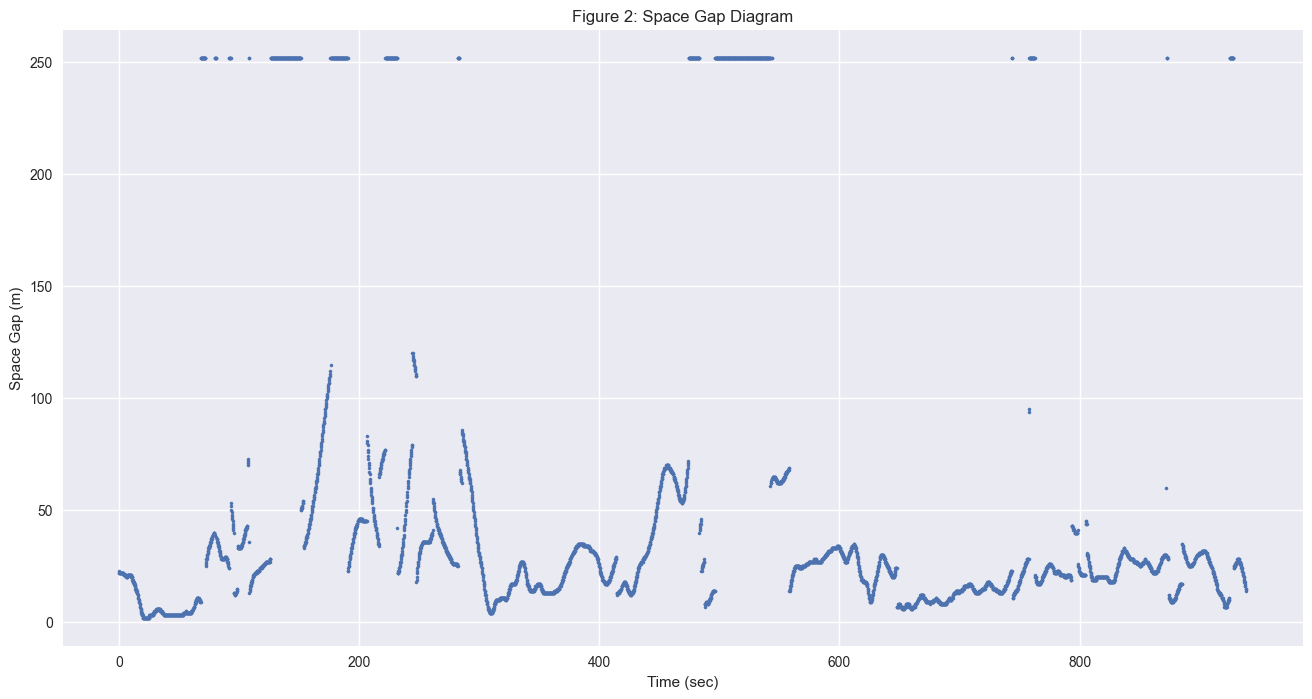

In [44]:
t_dist = lead_distance.iloc[0].Time
plt.scatter(lead_distance.Time-t_dist,lead_distance.Message, s=5)
plt.xlabel("Time (sec)")
plt.ylabel("Space Gap (m)")
plt.title("Figure 2: Space Gap Diagram")
plt.show()

**Question 3.26 Determine how many times the lead vehicle changes (either a cut-in or a cut-out) there are during this drive. Hint: use information about the length of an average car, along with discontinuities in the dataframe.**

There are 57 times the lead vehicle changes during the drive. We set a threshold value as the car length, and any absolute value of the change of distance larger than the threshold will be considered a vehicle change. 

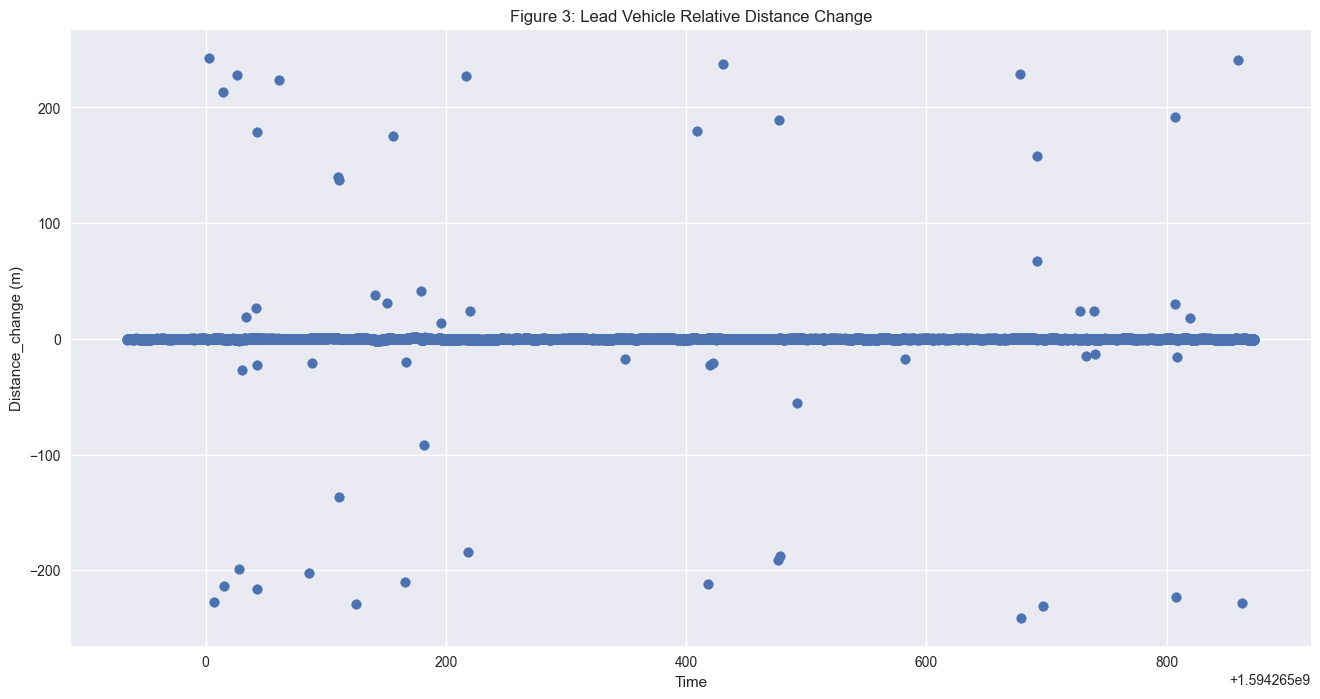

In [45]:
# I discussed with Xia Wang for this question, and simplified the implementation

# Calculate the change in distance
lead_distance['distance_change'] = lead_distance['Message'].diff()

# Plot the data
plt.scatter(lead_distance['Time'], lead_distance['distance_change'])
plt.xlabel("Time")
plt.ylabel("Distance_change (m)")
plt.title("Figure 3: Lead Vehicle Relative Distance Change")
plt.show()

In [46]:
# I asked chatgpt for the calculation

# Calculate the absolute value of distance change
lead_distance['abs_distance_change'] = lead_distance['distance_change'].abs()

avg_car_length = 4.5

# Identify rows where the absolute distance change exceeds the threshold
vehicle_changes = lead_distance[lead_distance['abs_distance_change'] > avg_car_length]

# Count the number of times the lead vehicle changes
num_changes = len(vehicle_changes)

print(num_changes)


57


**Question 3.27 Do the speed and lead\_distance data come at the same frequency?**

No. The speed data have a frequency of 38 while the lead distance data come with a frequency of 5.

In [47]:
fq_speed = t_speed.shape[0] / (t_speed.Time.max() - t_speed.Time.min())
fq_lead_distance = lead_distance.shape[0] / (lead_distance.Time.max() - lead_distance.Time.min())
print(fq_speed)
print(fq_lead_distance)

38.526860988761776
5.000951309574975


**Question 3.28 Merge the speed and lead\_distance dataframes, using a zero-order-hold approach (in pandas, the method merge\_asof may be used), to acquire the speed and space gap. Based on your answer to the previous question, how should you merge the dataframes?**

Since the frequency of the speed data is larger than lead distance, we can merge the dataframes on "Clock" (have to reset index first for lead_distance because Clock is not a column at first). Thus, after merging, the new dataframe will have the same number of rows as the speed data and the missing column LeadDistance is added.

In [48]:
# I discussed with Xia Wang for this question

In [96]:
lead_distance_copy = r.lead_distance()

In [106]:
lead_distance_copy.drop(columns=['MessageLength'], inplace=True)

In [113]:
lead_distance_copy.reset_index(inplace=True)

In [114]:
lead_distance_copy.head(1)

,Clock,Time,LeadDistance
0,2020-07-09 03:22:14.485035776,1.594265e+09,23


In [115]:
lead_distance_copy.columns

Index(['Clock', 'Time', 'LeadDistance'], dtype='object')

In [104]:
t_speed = r.speed()
t_speed.reset_index(inplace=True)
t_speed.drop(columns=['MessageLength'], inplace=True)
t_speed.rename(columns={'Message': 'Speed'}, inplace=True)

t_speed.head(1)

,Clock,Time,Speed
0,2020-07-09 03:22:14.401134848,1.594265e+09,45.16


In [105]:
t_speed.columns

Index(['Clock', 'Time', 'Speed'], dtype='object')

In [116]:
t_speed.columns = ['Clock','Time','Speed']
lead_distance_copy.columns = ['Clock', 'Time','LeadDistance']


In [122]:
merge_df = pd.merge_asof(t_speed[['Clock','Time','Speed']],lead_distance_copy[['Clock','LeadDistance']],on='Clock',allow_exact_matches=False,direction='nearest')

In [123]:
merge_df

,Clock,Time,Speed,LeadDistance
0,2020-07-09 03:22:14.401134848,1.594265e+09,45.16,23
1,2020-07-09 03:22:14.426441984,1.594265e+09,45.36,23
2,2020-07-09 03:22:14.452655104,1.594265e+09,45.48,23
3,2020-07-09 03:22:14.477725952,1.594265e+09,45.24,23
4,2020-07-09 03:22:14.503663104,1.594265e+09,45.20,23
...,...,...,...,...
36167,2020-07-09 03:37:53.170595840,1.594266e+09,19.91,14
36168,2020-07-09 03:37:53.198221056,1.594266e+09,19.74,14
36169,2020-07-09 03:37:53.224801024,1.594266e+09,19.67,14
36170,2020-07-09 03:37:53.251568128,1.594266e+09,19.51,14


In [124]:
merge_df.shape,t_speed.shape,lead_distance_copy.shape

((36172, 4), (36172, 3), (4694, 3))

**Question 3.29 Calculate and plot the time gap using the unified dataframe from the previous question.**

See Figure 4 below.

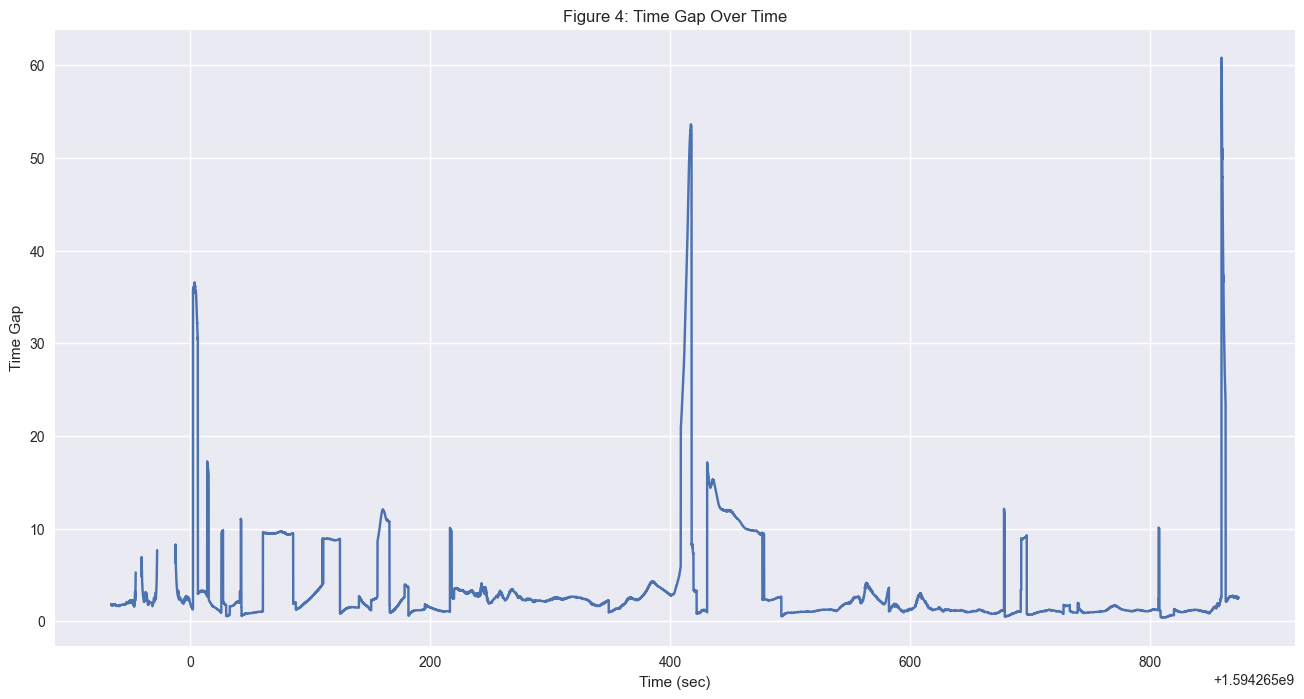

In [126]:
merge_df['speed_mps'] = merge_df.Speed * 1000 / 3600
merge_df['time_gap'] = merge_df.LeadDistance / merge_df.speed_mps
plt.plot(merge_df.Time, merge_df.time_gap)
plt.xlabel("Time (sec)")
plt.ylabel("Time Gap")
plt.title("Figure 4: Time Gap Over Time")
plt.show()

**Question 3.30 Integrate the speed signal using the method of your choice, to estimate the total distance
traveled. Does this make sense, given your estimates made on averaged data above?**

See Figure 5 below. This makes sense because we can see that the cumulative total distance traveled is somewhere between 16.0 and 16.5 km, which is similar to our previous calculation 16.3 km. 

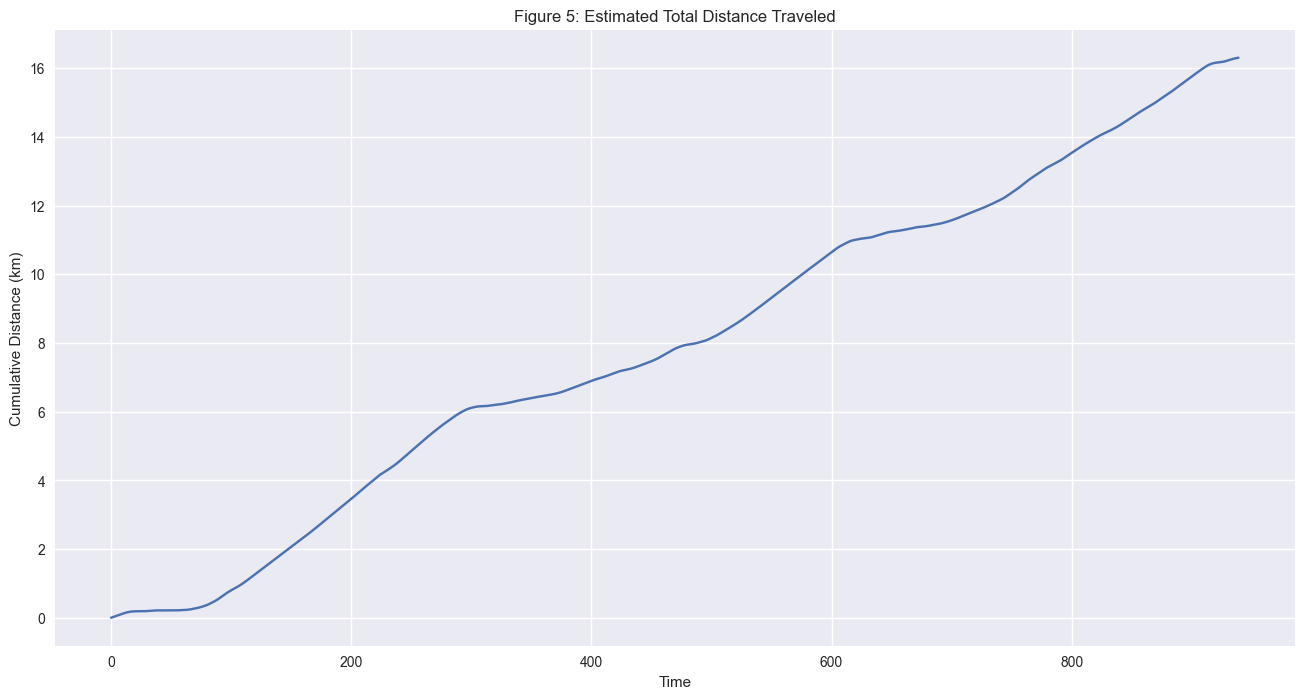

In [131]:
# I asked chatGPT for this question

def calculate_odometer(t_speed):
    shifted_speed = t_speed.shift(1)
    t_speed['total_distance'] = (t_speed['Speed'] + shifted_speed['Speed']) * (t_speed['Time'] - shifted_speed['Time']) / 3600 / 2
    t_speed['total_distance_cum'] = t_speed['total_distance'].cumsum().fillna(0)
    return t_speed

def plot_odometer(df):
    t0 = df.iloc[0].Time
    plt.plot(df.Time - t0, df.total_distance_cum)
    plt.xlabel("Time")
    plt.ylabel("Cumulative Distance (km)")
    plt.title("Figure 5: Estimated Total Distance Traveled")
    plt.show()

# Execute the functions
speed_data = calculate_odometer(t_speed)
plot_odometer(speed_data)


**Question 3.31 Plot the trajectory of this vehicle in a time space diagram and comment on what you observe. Did you need to merge any additional dataframes?**

See Figure 6. The acceleration of the vehicle slightly fluctuates but remains stable overall. The vehicle is accelerating the most from t=100 to t=300. It doesn't appear that we need to merge additional dataframes.

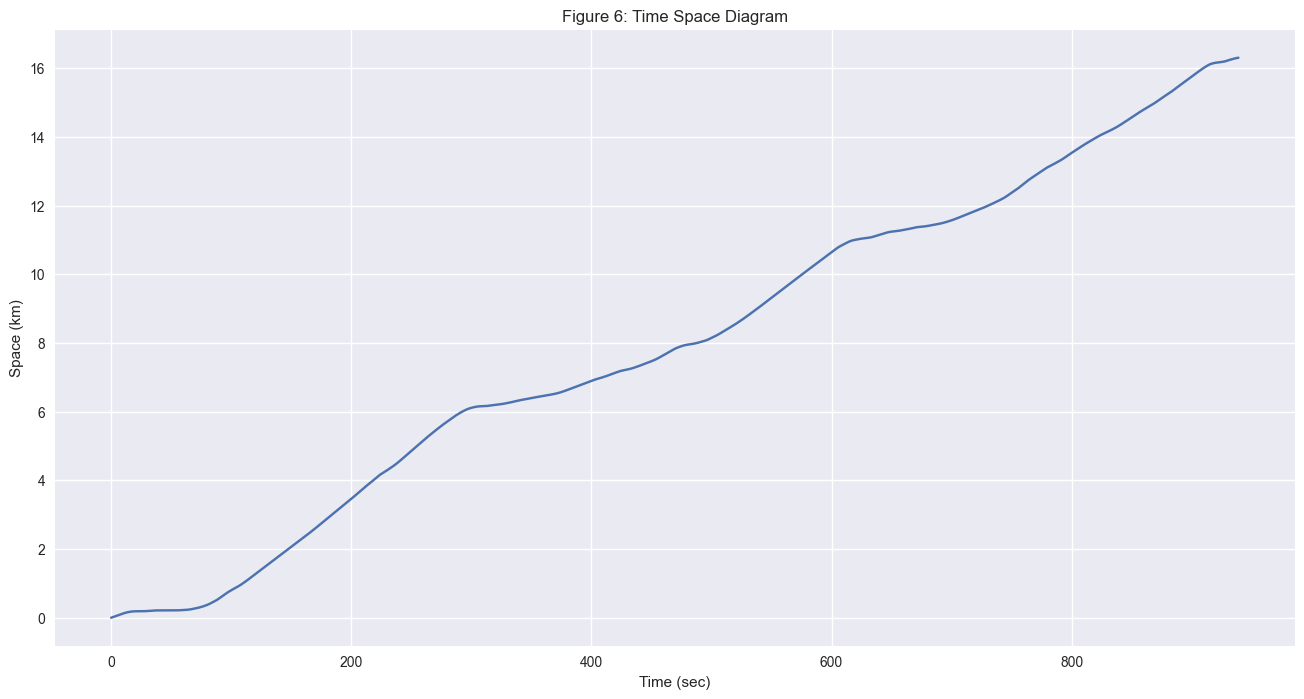

In [135]:
def plot_time_space_diagram(df):
    x = df.iloc[0].Time
    plt.plot(df.Time - x, df.total_distance_cum)
    plt.xlabel("Time (sec)")
    plt.ylabel("Space (km)")
    plt.title("Figure 6: Time Space Diagram")
    plt.show()
    
speed_data = calculate_odometer(t_speed)
plot_time_space_diagram(speed_data)

**Question 3.32 Do you think the cruise control was on for some, all, or none of this drive? Does the time gap (or a filtered version of it) help justify your hypothesis? Can you validate the cruise control state with a message that is decoded by strym?**

I think the cruise control was on for some parts of this drive. By Figure 4, the time gap skyrocketed at t=400s, indicating there is another vehicle cutting in. By Figure 7, we can also see that at around t=400s, the velocity declined drastically, and recovered soon. By Figure 8, we decoded the cruise state signal to validate the results.

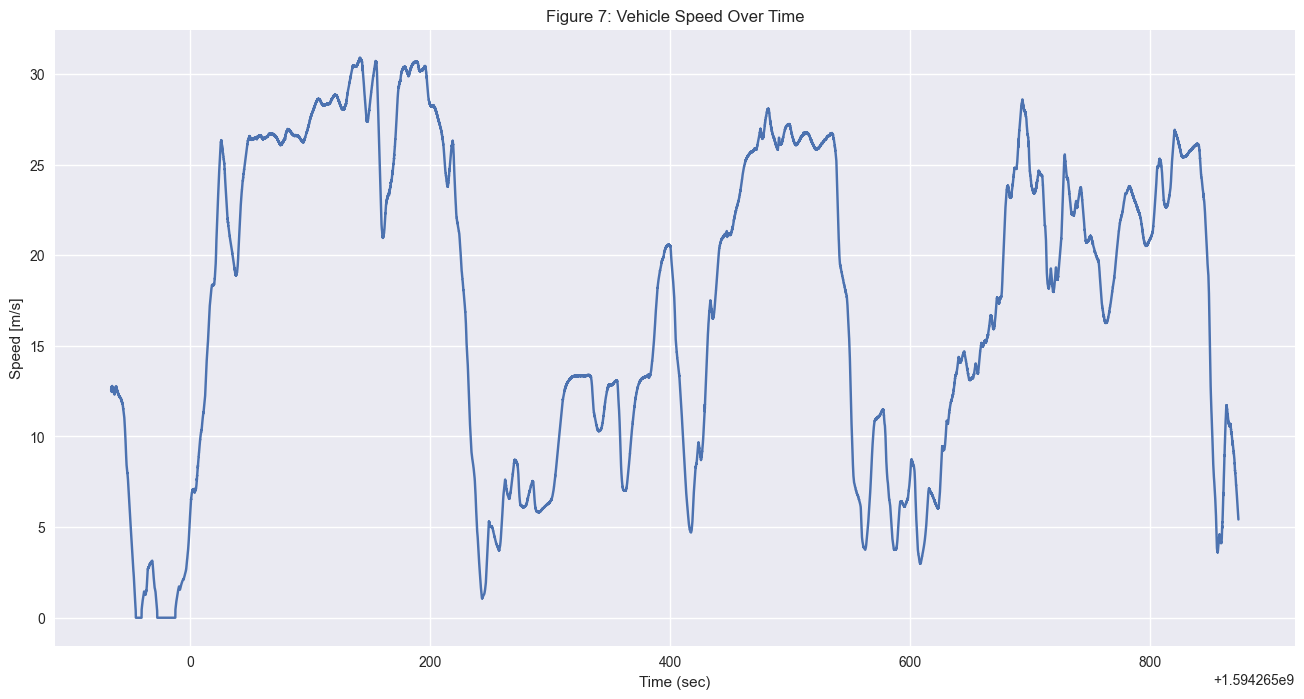

In [136]:
plt.plot(merge_df.Time, merge_df.speed_mps)
plt.xlabel("Time (sec)")
plt.ylabel("Speed [m/s]")
plt.title("Figure 7: Vehicle Speed Over Time")
plt.show()

In [145]:
# I referred to the instructions in class, and discussed with Xia Wang for this part of the question (cruise state validation)

db = cantools.database.Database()
with open(dbcfile,'r') as path:    
    db = cantools.database.load(path)
drive = pd.read_csv(csvdata)

cruise_state = s.convertData('PCM_CRUISE','CRUISE_ACTIVE',drive,db)


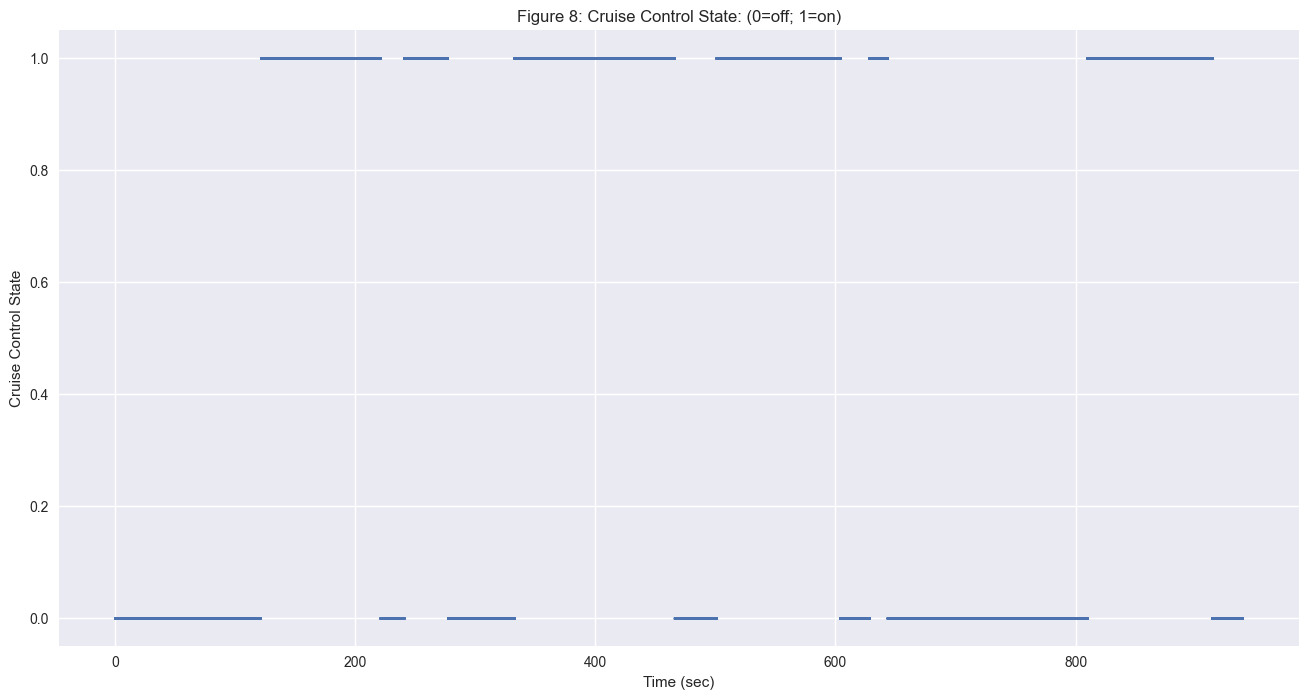

In [165]:
x = cruise_state.iloc[0].Time
plt.scatter(cruise_state.Time-x,cruise_state.Message,s=2)
plt.xlabel("Time (sec)")
plt.ylabel("Cruise Control State")
plt.title("Figure 8: Cruise Control State: (0=off; 1=on)")
plt.show()

**Question 3.33 In at least two additional plots, select additional signals from among those below, and use your ingenuity and imagination to compare them to signals you have already decoded in two different examples. Overlay the signals on top of one another, or otherwise plot them. Do the signals make sense when considered alongside one another?
• Lead vehicle relative distance 
• Acceleration in the X direction 
• Adaptive Cruise Control State 
• Steering angle
• Wheel encoders
• Acceleration in the Y direction**

Select: Lead vehicle relative distance, and Adaptive Cruise Control State. 

See Figure 9 and 10. 

We can see that the signals make sense.

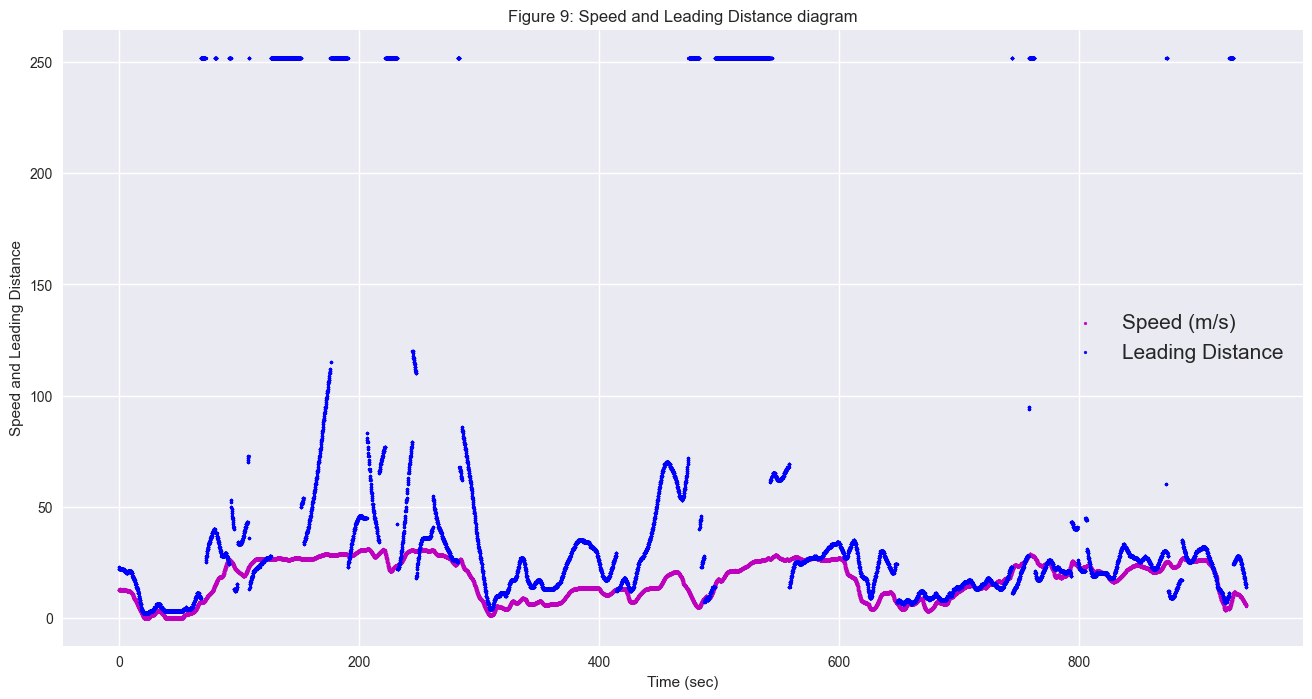

In [159]:
# Lead vehicle relative distance v.s speed
merge_df['speed_mps'] = merge_df.Speed * 1000/3600 # convert the unit of velocity from km/h to m/s
x = merge_df.iloc[0].Time
plt.scatter(merge_df.Time-x,merge_df.speed_mps,c='m',s=4,label='Speed (m/s)')
plt.scatter(merge_df.Time-x,merge_df.LeadDistance,c='b',s=4,label='Leading Distance')
plt.legend(["Speed (m/s)", "Leading Distance"], fontsize="15", loc ="right")
plt.xlabel("Time (sec)")
plt.ylabel("Speed and Leading Distance")
plt.title("Figure 9: Speed and Leading Distance diagram")
plt.show()

In [166]:
cruise_state.head(1)


,Time,Message,Bus
90,1.594265e+09,0,0


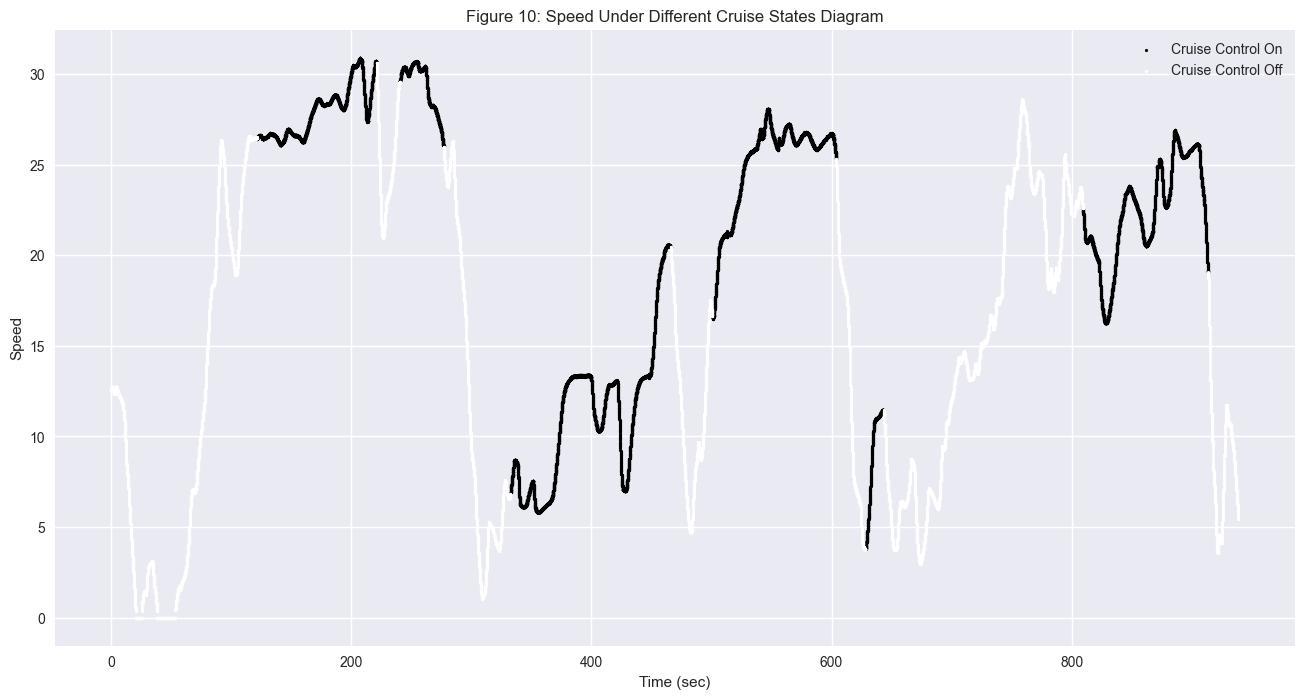

In [173]:
# Adaptive Cruise Control State v.s speed. I asked chatGPT for this question

# Setting column names
cruise_state.columns = ['Time', 'CruiseState', 'Bus']

# Merging datasets
merged_df2 = pd.merge_asof(
    t_speed[['Clock', 'Time', 'Speed']],
    cruise_state[['Time', 'CruiseState']],
    on='Time',
    allow_exact_matches=False,
    direction='nearest'
)

# Convert speed to m/s
merged_df2['speed_mps'] = merged_df2.Speed * 1000 / 3600

# Time adjustment
x = merged_df2.iloc[0].Time
merged_df2.Time -= x

# Plotting
for state, color, label in [(1, 'k', 'Cruise Control On'), (0, 'w', 'Cruise Control Off')]:
    subset = merged_df2[merged_df2.CruiseState == state]
    plt.scatter(subset.Time, subset.speed_mps, c=color, s=4, label=label)

plt.legend()
plt.xlabel("Time (sec)")
plt.ylabel("Speed")
plt.title("Figure 10: Speed Under Different Cruise States Diagram")
plt.show()


### 3.3 Aggregate Data: All Toyota Data across many files

**Question 3.34 Steering angle absolute value (y-axis), speed (in m/s) (x-axis) as a scatter plot.**

In [213]:
folder = "Data/"

dataset = []
sub_path = os.listdir(folder)
for i in sub_path:
    file_list = os.listdir(folder + i + '/')
    for j in file_list:
        if "CAN" not in j or "Toyota" not in j:
            continue
        dataset.append(folder + i + '/' + j)

In [228]:
# I used chatGPT for this part of the question
dbcfile  = 'toyota_rav4_2019.dbc'
s_list = []

s_a_list = []
r_list = []

for csv in dataset:
    print(f"\nProcessing {csv}")
    r = strymread(csvfile=csv, dbcfile=dbcfile)

    # Filter out files recorded with Python based on burst flag
    if r.success and not r.burst:
        r_list.append(r)
        
        speed = r.speed()
        speed['Message'] /= 3.6  
        
        sa = r.steer_angle()
        sa['Message'] = abs(sa.Message)
    
        s_list.append(speed)
        s_a_list.append(steering_angle)



Processing Data/Test6/2021-04-16-14-11-06_Toyota2_CAN_Messages.csv

Processing Data/Test6/2021-04-16-14-07-16_Toyota2_CAN_Messages.csv

Processing Data/Test1/2020-07-08-20-22-14_Toyota_CAN_Messages.csv

Processing Data/Test4/2021-02-11-12-06-16_Toyota2_CAN_Messages.csv

Processing Data/Test4/2021-02-11-12-26-23_Toyota2_CAN_Messages.csv

Processing Data/Test4/2021-02-11-06-29-10_Toyota2_CAN_Messages.csv

Processing Data/Test4/2021-02-11-14-18-18_Toyota2_CAN_Messages.csv

Processing Data/Test4/2021-02-11-11-38-27_Toyota2_CAN_Messages.csv

Processing Data/Test4/2021-02-11-12-58-30_Toyota2_CAN_Messages.csv

Processing Data/Test4/2021-02-11-14-41-15_Toyota2_CAN_Messages.csv

Processing Data/Test4/2021-02-11-11-06-54_Toyota2_CAN_Messages.csv

Processing Data/Test4/2021-02-11-16-31-56_Toyota2_CAN_Messages.csv

Processing Data/Test4/2021-02-11-13-49-16_Toyota2_CAN_Messages.csv

Processing Data/Test4/2021-02-11-11-44-47_Toyota2_CAN_Messages.csv

Processing Data/Test3/2021-02-03-21-47-14_Toyota

In [242]:
speed.head(1)

,Time,Message,MessageLength
Clock,,,
2021-04-16 21:11:06.801536,1.618607e+09,0.0,8


In [243]:
sa.head(1)

,Time,Message,MessageLength
Clock,,,
2021-04-06 18:13:20.171917824,1.617733e+09,16.5,8


In [ ]:
r_speeds = []

for s, angle in zip(s_list, s_a_list):
    if s.shape[0] == 0:
        continue
    s_new, angle_new = strymread.ts_sync(s, angle, rate="second")
    df = pd.DataFrame({
        'Time': s_new['Time'],
        'Speed': s_new['Message'],
        'Steering_Angle': angle_new['Message']
    })
    r_speeds.append(df)
steering_angle = pd.concat(r_speeds)

In [ ]:
figure, val = strymread.create_fig(1)
figure.set_size_inches(10, 10)
val[0].scatter(x = 'Speed', y = 'Steering_Angle', data = steering_angle, s = 1, color = 'r')
val[0].set_xlabel('Speed (m/s)')
val[0].set_ylabel('Steering Angle (degrees)')
val[0].set_title('Figure 11: Speed and Steering Angle Relationship')
plt.show()

**Question 3.35 Acceleration (y-axis), speed (y-axis) as a scatter plot.**


In [252]:
# I used chatGPT for this part of the question
dbcfile  = 'toyota_rav4_2019.dbc'
s_list = []

a_list = []
r_list = []

for csv in dataset:
    print(f"\nProcessing {csv}")
    r = strymread(csvfile=csv, dbcfile=dbcfile)

    # Filter out files recorded with Python based on burst flag
    if r.success and not r.burst:
        r_list.append(r)
        
        speed = r.speed()
        speed['Message'] /= 3.6  
        accelx = r.accelx()
    
        s_list.append(speed)
        a_list.append(accelx)


Processing Data/Test6/2021-04-16-14-11-06_Toyota2_CAN_Messages.csv

Processing Data/Test6/2021-04-16-14-07-16_Toyota2_CAN_Messages.csv

Processing Data/Test1/2020-07-08-20-22-14_Toyota_CAN_Messages.csv

Processing Data/Test4/2021-02-11-12-06-16_Toyota2_CAN_Messages.csv

Processing Data/Test4/2021-02-11-12-26-23_Toyota2_CAN_Messages.csv

Processing Data/Test4/2021-02-11-06-29-10_Toyota2_CAN_Messages.csv

Processing Data/Test4/2021-02-11-14-18-18_Toyota2_CAN_Messages.csv

Processing Data/Test4/2021-02-11-11-38-27_Toyota2_CAN_Messages.csv

Processing Data/Test4/2021-02-11-12-58-30_Toyota2_CAN_Messages.csv

Processing Data/Test4/2021-02-11-14-41-15_Toyota2_CAN_Messages.csv

Processing Data/Test4/2021-02-11-11-06-54_Toyota2_CAN_Messages.csv

Processing Data/Test4/2021-02-11-16-31-56_Toyota2_CAN_Messages.csv

Processing Data/Test4/2021-02-11-13-49-16_Toyota2_CAN_Messages.csv

Processing Data/Test4/2021-02-11-11-44-47_Toyota2_CAN_Messages.csv

Processing Data/Test3/2021-02-03-21-47-14_Toyota

In [ ]:
r_speeds = []

for speed, acc in zip(s_list, a_list):
    if speed.shape[0] == 0:
        continue
    s_new, a_new = strymread.ts_sync(speed, acc, rate="second")
    df = pd.DataFrame({
        'Time': s_new['Time'],
        'Speed': s_new['Message'],
        'Acceleration': a_new['Message']
    })
    r_speeds.append(df)
s_acc = pd.concat(r_speeds)

In [ ]:
figure, val = strymread.create_fig(1)
figure.set_size_inches(10, 10)
val[0].scatter(x = 'Speed', y = 'Acceleration', data = s_acc, s = 1, color = 'r')
val[0].set_xlabel('Speed (m/s)')
val[0].set_ylabel('Acceleration (m/s^2)')
val[0].set_title('Figure 12: Speed and Acceleration Relationship')
plt.show()

**Question 3.36 Histogram: all positive acceleration (choose bins and scale as you see appropriate)**

See Figure 13.

In [ ]:
params = np.linspace(0, 4, 40)  

plt.hist(s_acc[s_acc.Acceleration > 0].Acceleration, bins=params)
plt.xlabel("Acceleration (m/s^2)")
plt.ylabel("Number count")
plt.title("Figure 13: Histogram: All Positive Acceleration")
plt.show()

**Question 3.37 Histogram: all negative acceleration (choose bins and scale as you see appropriate)**

See Figure 14.

In [ ]:
params2 = np.linspace(-4, 0, 40)  

plt.hist(s_acc[s_acc.Acceleration < 0].Acceleration, bins=params2)
plt.xlabel("Acceleration (m/s^2)")
plt.ylabel("Number count")
plt.title("Figure 14: Histogram: All Negative Acceleration")
plt.show()

**3.4 Reflection
Some analysis and plotting from Homework 1 related to large-scale traffic flow metrics are not included in this homework. Talk about whether you think some, none, or all of those could be reconstructed, based on data from just one vehicle like the Toyota featured in this assignment.**

I think none of those could be reconstructed, because many of the traffic flow metrics such as density and flow need data from a large number of vehicles, not just one vehicle.